In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from datetime import datetime

In [2]:
# df = pd.read_csv('train.csv', thousands = '.')
df = pd.read_csv('train.csv')
df

,일시,광진구,동대문구,성동구,중랑구
0,20180101,0.592,0.368,0.580,0.162
1,20180102,0.840,0.614,1.034,0.260
2,20180103,0.828,0.576,0.952,0.288
3,20180104,0.792,0.542,0.914,0.292
4,20180105,0.818,0.602,0.994,0.308
...,...,...,...,...,...
1456,20211227,3.830,3.416,2.908,2.350
1457,20211228,4.510,3.890,3.714,2.700
1458,20211229,4.490,3.524,3.660,2.524
1459,20211230,4.444,3.574,3.530,2.506


In [3]:
print(df[df['일시'] == 20190907])

           일시  광진구  동대문구  성동구  중랑구
614  20190907  0.0   0.0  0.0  0.0


In [4]:
print(df[df['일시'] == 20190906])
print(df[df['일시'] == 20190908])

           일시   광진구   동대문구    성동구    중랑구
613  20190906  2.02  1.396  1.504  1.024
           일시   광진구   동대문구    성동구    중랑구
615  20190908  5.83  2.658  4.188  2.482


In [5]:
df.loc[614] = [20190907, 3.93, 2.027, 2.846, 1.753]
print(df[613:616])

           일시   광진구   동대문구    성동구    중랑구
613  20190906  2.02  1.396  1.504  1.024
614  20190907  3.93  2.027  2.846  1.753
615  20190908  5.83  2.658  4.188  2.482


In [6]:
df = df.drop(['동대문구','성동구','중랑구'],axis=1)
# df['광진구'] = df['광진구']*1000
# df = df.astype({'광진구': 'int'})
df

,일시,광진구
0,20180101,0.592
1,20180102,0.840
2,20180103,0.828
3,20180104,0.792
4,20180105,0.818
...,...,...
1456,20211227,3.830
1457,20211228,4.510
1458,20211229,4.490
1459,20211230,4.444


In [7]:
df.columns = ['date','Gwangjin-gu']

In [8]:
weather = pd.read_csv('weather1.csv', encoding='cp949')
weather

,지점,지점명,일시,평균기온(°C),일강수량(mm),최대 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일조시간(hr),합계 일사량(MJ/m2),일 최심적설(cm),평균 전운량(1/10),평균 지면온도(°C)
0,108,서울,2018-01-01,-1.3,NaN,3.8,39.1,9.6,8.3,6.14,NaN,1.0,-1.7
1,108,서울,2018-01-02,-1.8,NaN,4.9,42.0,9.6,7.9,5.36,NaN,2.3,-2.3
2,108,서울,2018-01-03,-4.7,NaN,3.5,42.3,9.7,8.6,6.56,NaN,3.6,-3.4
3,108,서울,2018-01-04,-4.7,NaN,3.5,43.0,9.7,6.2,4.73,NaN,6.5,-3.3
4,108,서울,2018-01-05,-3.0,NaN,3.6,48.4,9.7,8.2,5.96,NaN,3.6,-2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,108,서울,2021-12-27,-7.6,0.0,3.1,60.9,9.6,3.8,6.09,NaN,3.1,-4.7
1457,108,서울,2021-12-28,-4.1,NaN,3.1,73.8,9.6,1.7,4.32,NaN,4.1,-3.3
1458,108,서울,2021-12-29,0.4,0.2,5.9,72.9,9.6,1.8,4.64,0.3,5.1,-0.7
1459,108,서울,2021-12-30,-3.9,0.0,6.6,48.5,9.6,7.3,9.14,NaN,2.0,-2.7


In [9]:
weather = weather.drop(['지점','지점명','일시'],axis=1)
weather = weather.fillna(0)
weather.head()

,평균기온(°C),일강수량(mm),최대 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일조시간(hr),합계 일사량(MJ/m2),일 최심적설(cm),평균 전운량(1/10),평균 지면온도(°C)
0,-1.3,0.0,3.8,39.1,9.6,8.3,6.14,0.0,1.0,-1.7
1,-1.8,0.0,4.9,42.0,9.6,7.9,5.36,0.0,2.3,-2.3
2,-4.7,0.0,3.5,42.3,9.7,8.6,6.56,0.0,3.6,-3.4
3,-4.7,0.0,3.5,43.0,9.7,6.2,4.73,0.0,6.5,-3.3
4,-3.0,0.0,3.6,48.4,9.7,8.2,5.96,0.0,3.6,-2.6


In [10]:
df = pd.concat([df,weather],axis=1)
df.head()

,date,Gwangjin-gu,평균기온(°C),일강수량(mm),최대 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일조시간(hr),합계 일사량(MJ/m2),일 최심적설(cm),평균 전운량(1/10),평균 지면온도(°C)
0,20180101,0.592,-1.3,0.0,3.8,39.1,9.6,8.3,6.14,0.0,1.0,-1.7
1,20180102,0.840,-1.8,0.0,4.9,42.0,9.6,7.9,5.36,0.0,2.3,-2.3
2,20180103,0.828,-4.7,0.0,3.5,42.3,9.7,8.6,6.56,0.0,3.6,-3.4
3,20180104,0.792,-4.7,0.0,3.5,43.0,9.7,6.2,4.73,0.0,6.5,-3.3
4,20180105,0.818,-3.0,0.0,3.6,48.4,9.7,8.2,5.96,0.0,3.6,-2.6


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   int64  
 1   Gwangjin-gu    1461 non-null   float64
 2   평균기온(°C)       1461 non-null   float64
 3   일강수량(mm)       1461 non-null   float64
 4   최대 풍속(m/s)     1461 non-null   float64
 5   평균 상대습도(%)     1461 non-null   float64
 6   가조시간(hr)       1461 non-null   float64
 7   합계 일조시간(hr)    1461 non-null   float64
 8   합계 일사량(MJ/m2)  1461 non-null   float64
 9   일 최심적설(cm)     1461 non-null   float64
 10  평균 전운량(1/10)   1461 non-null   float64
 11  평균 지면온도(°C)    1461 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 137.1 KB


c:\Users\wooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.draw()
c:\Users\wooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.draw()
c:\Users\wooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.draw()
c:\Users\wooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.draw()
c:\Users\wooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
c:\Users\wooji\AppData\Local\Programs\P

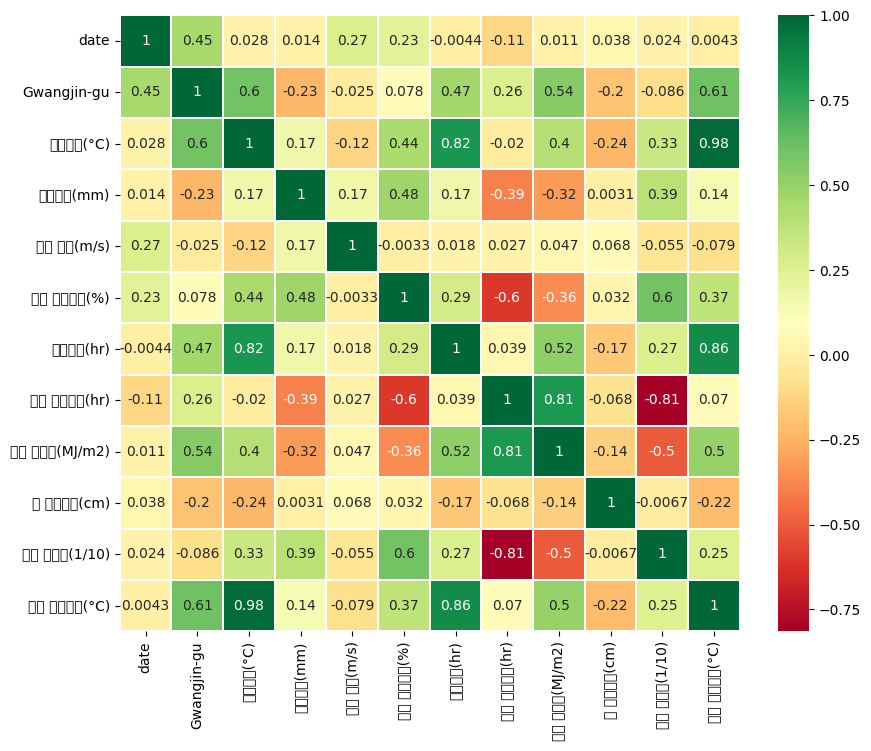

In [12]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [13]:
df.columns

Index(['date', 'Gwangjin-gu', '평균기온(°C)', '일강수량(mm)', '최대 풍속(m/s)',
       '평균 상대습도(%)', '가조시간(hr)', '합계 일조시간(hr)', '합계 일사량(MJ/m2)', '일 최심적설(cm)',
       '평균 전운량(1/10)', '평균 지면온도(°C)'],
      dtype='object')

In [14]:
df = df.drop(['일강수량(mm)', '최대 풍속(m/s)', '일 최심적설(cm)', '평균 전운량(1/10)'],axis = 1)
df.head(5)

,date,Gwangjin-gu,평균기온(°C),평균 상대습도(%),가조시간(hr),합계 일조시간(hr),합계 일사량(MJ/m2),평균 지면온도(°C)
0,20180101,0.592,-1.3,39.1,9.6,8.3,6.14,-1.7
1,20180102,0.840,-1.8,42.0,9.6,7.9,5.36,-2.3
2,20180103,0.828,-4.7,42.3,9.7,8.6,6.56,-3.4
3,20180104,0.792,-4.7,43.0,9.7,6.2,4.73,-3.3
4,20180105,0.818,-3.0,48.4,9.7,8.2,5.96,-2.6


In [15]:
df.columns = ['date','Gwangjin-gu','temp','hum','supplementary','sunshine duration','insolation','ground temp']

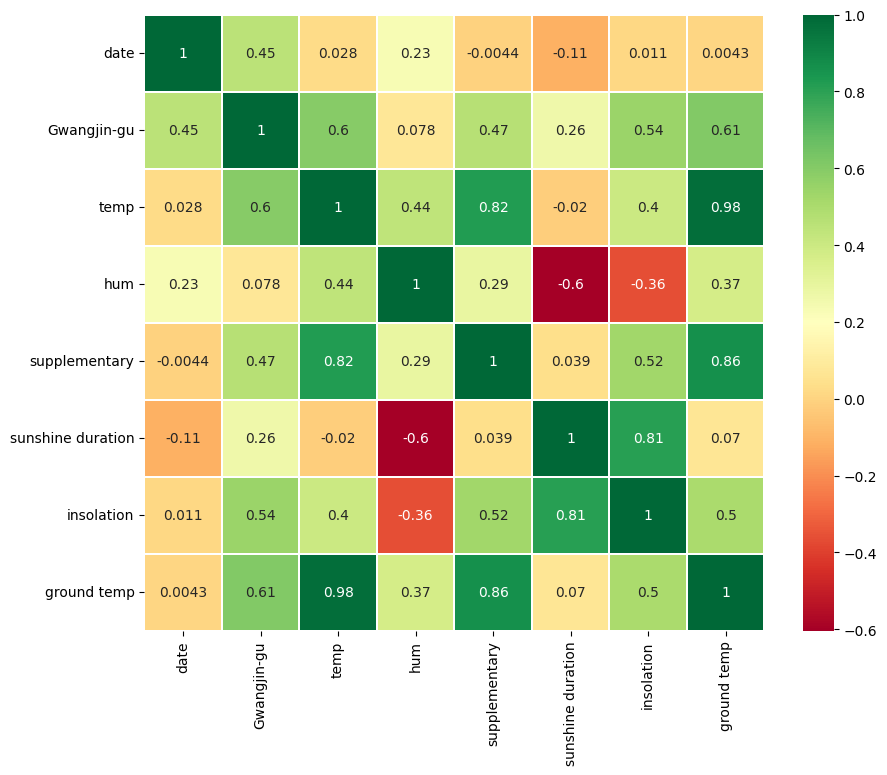

In [16]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [17]:
# def get_outlier(df=None, column=None, weight=1.5):
#       # target 값과 상관관계가 높은 열을 우선적으로 진행
#   quantile_15 = np.percentile(df[column].values, 25)
#   quantile_85 = np.percentile(df[column].values, 75)

#   IQR = quantile_85 - quantile_15
#   IQR_weight = IQR*weight
  
#   lowest = quantile_15 - IQR_weight
#   highest = quantile_85 + IQR_weight
  
#   outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
#   return outlier_idx

In [18]:
# columns = ['date','Gwangjin-gu','temp','hum','supplementary','sunshine duration','insolation','ground temp']

# for i in columns:
#     outlier_idx = get_outlier(df=df, column=i, weight=1.5)
#     df.drop(outlier_idx, axis=0, inplace=True)

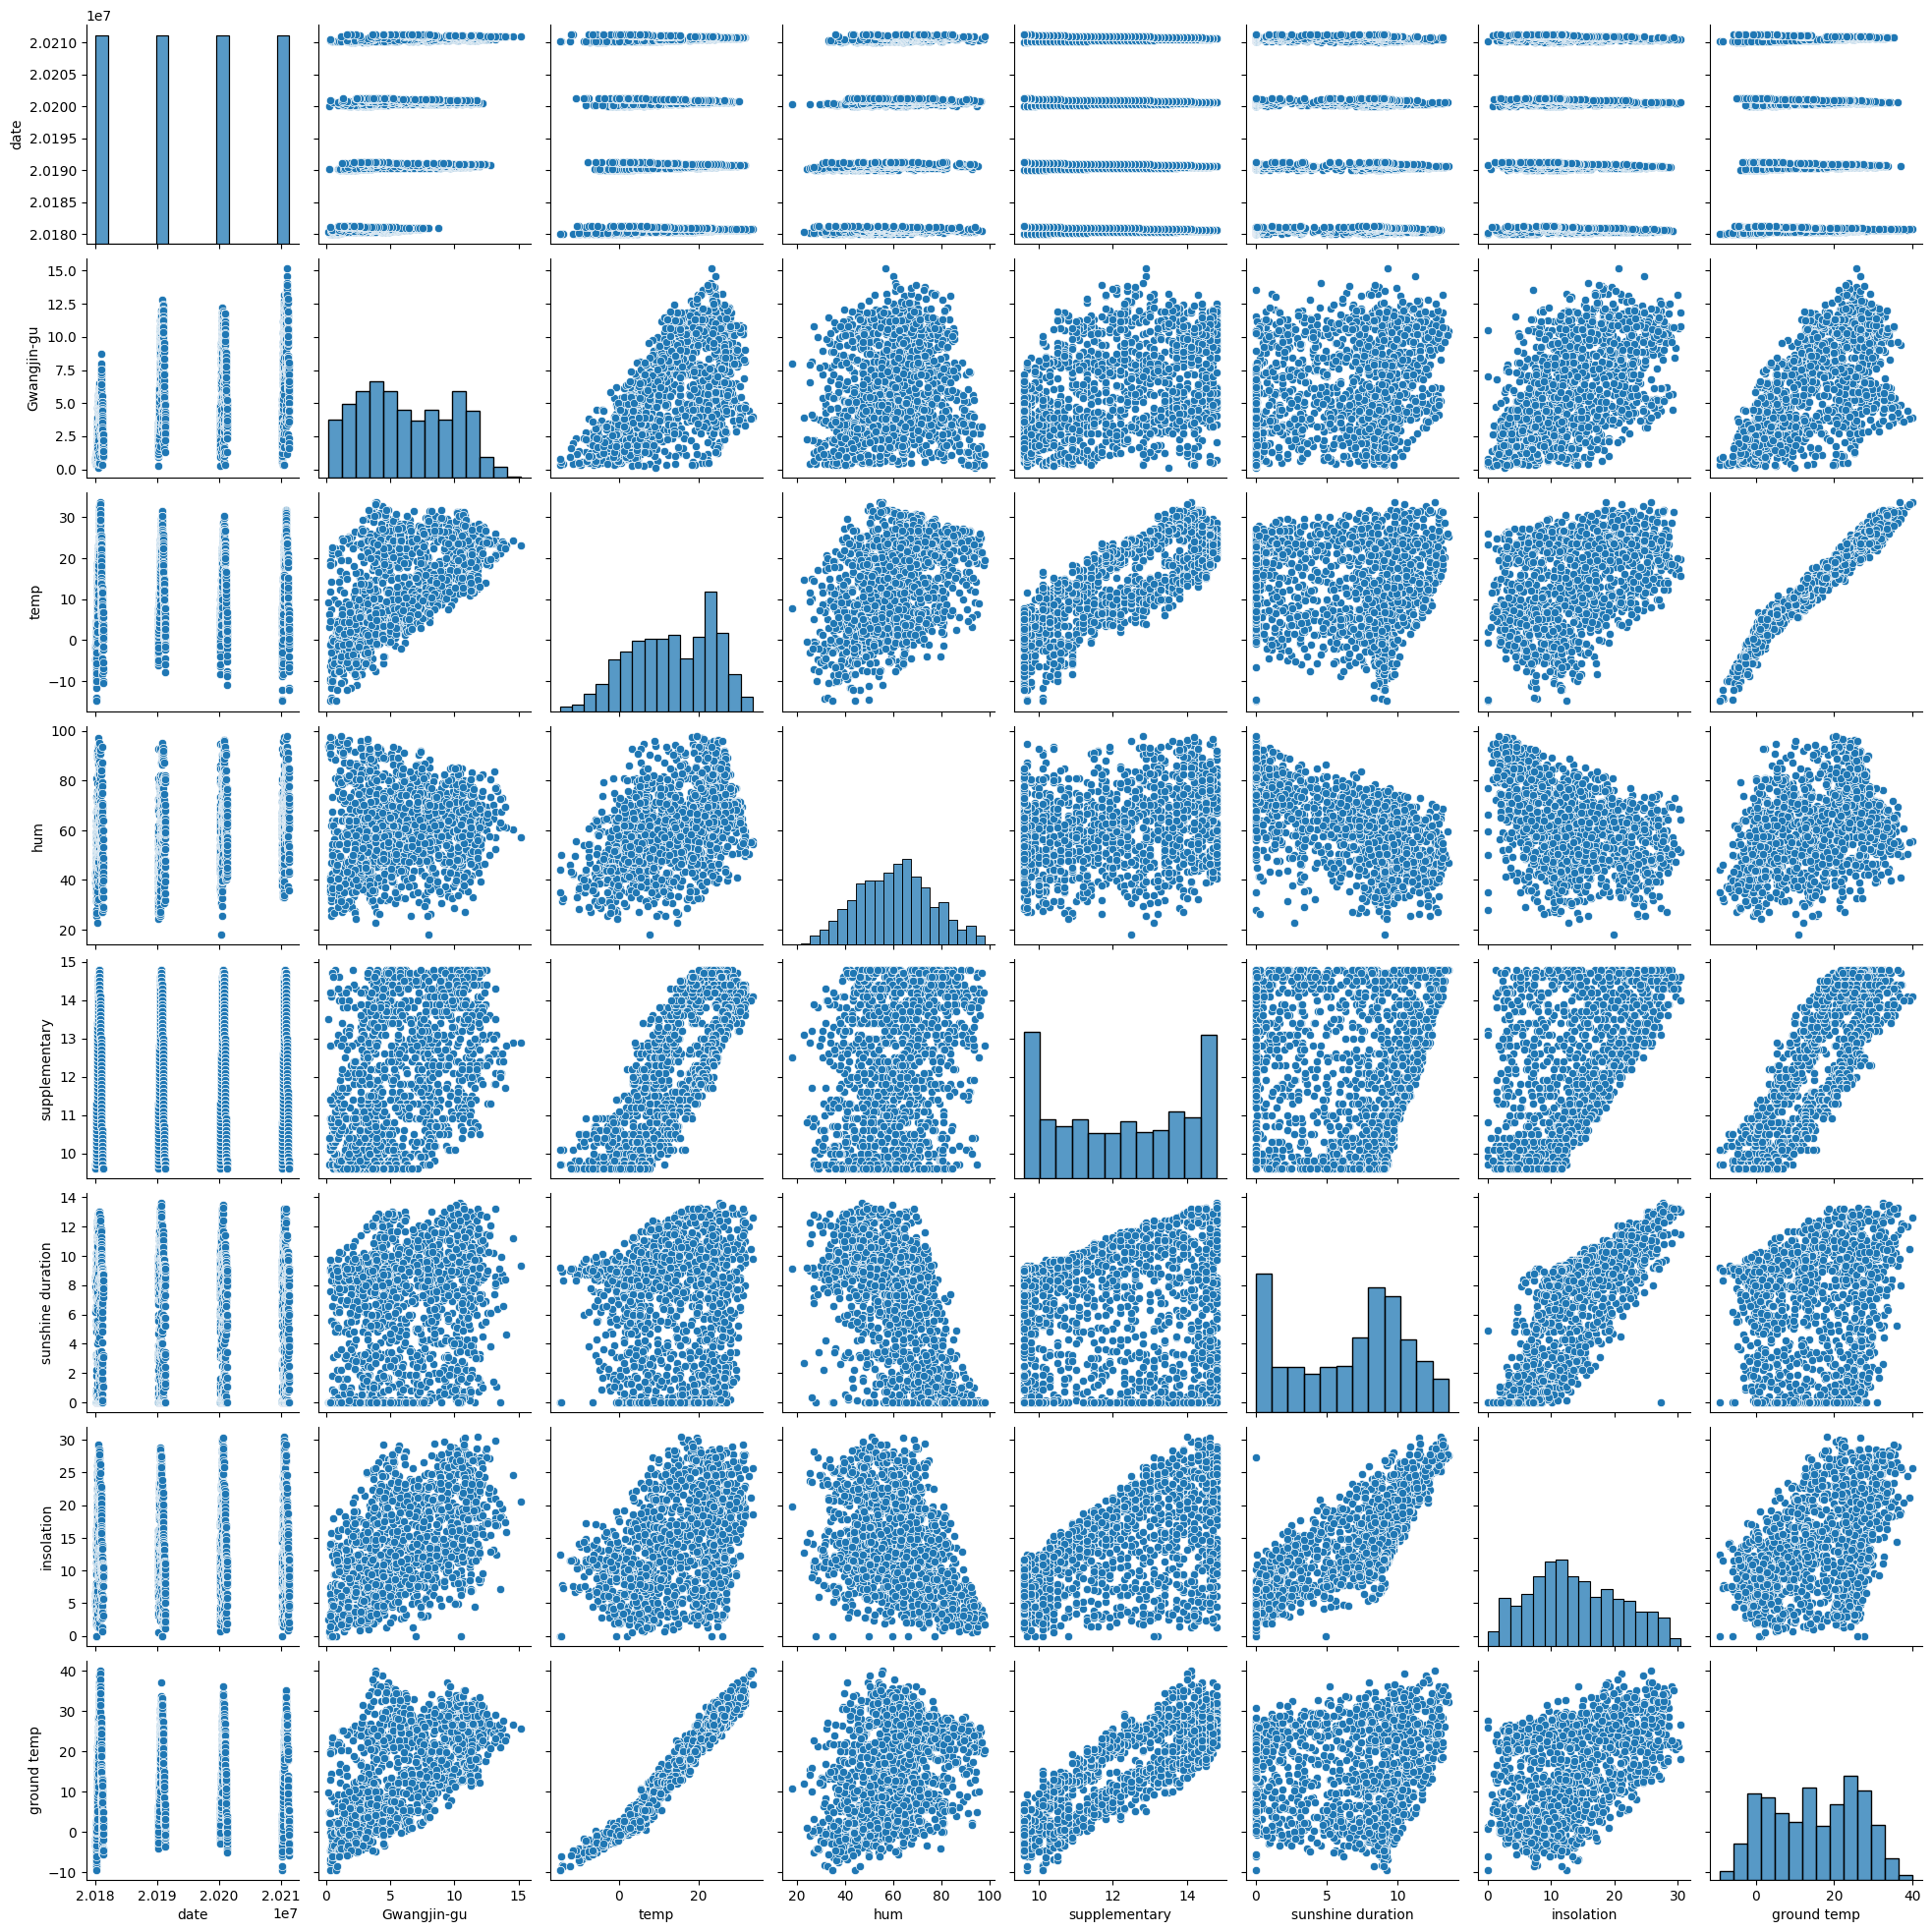

In [19]:
sns.pairplot(data=df)
plt.show()

In [20]:
df['date1'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['weekday'] = df['date1'].dt.weekday
df = df.drop(['date1'],axis=1)
df

,date,Gwangjin-gu,temp,hum,supplementary,sunshine duration,insolation,ground temp,weekday
0,20180101,0.592,-1.3,39.1,9.6,8.3,6.14,-1.7,0
1,20180102,0.840,-1.8,42.0,9.6,7.9,5.36,-2.3,1
2,20180103,0.828,-4.7,42.3,9.7,8.6,6.56,-3.4,2
3,20180104,0.792,-4.7,43.0,9.7,6.2,4.73,-3.3,3
4,20180105,0.818,-3.0,48.4,9.7,8.2,5.96,-2.6,4
...,...,...,...,...,...,...,...,...,...
1456,20211227,3.830,-7.6,60.9,9.6,3.8,6.09,-4.7,0
1457,20211228,4.510,-4.1,73.8,9.6,1.7,4.32,-3.3,1
1458,20211229,4.490,0.4,72.9,9.6,1.8,4.64,-0.7,2
1459,20211230,4.444,-3.9,48.5,9.6,7.3,9.14,-2.7,3


In [21]:
data = df.drop('Gwangjin-gu', axis=1).values
target = df['Gwangjin-gu'].values

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)
# from sklearn.tree import plot_tree
# rfTree= rf.estimators_[0]
# plot_tree(rfTree)
# plt.show()

RandomForestRegressor(random_state=1)

In [24]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9848029301215596
0.9036621459647066


※ RandomForest Regressor : 0.9077313206986467
- MAE : 753.266

In [25]:
pred = rf.predict(X_test)
mae = mean_absolute_error(y_test,pred)
print(f'MAE : {mae:.3f}')

MAE : 0.755


In [26]:
test_df = pd.read_csv('sample_submission.csv')
test_df

,일시,광진구,동대문구,성동구,중랑구
0,20220101,0,0,0,0
1,20220102,0,0,0,0
2,20220103,0,0,0,0
3,20220104,0,0,0,0
4,20220105,0,0,0,0
...,...,...,...,...,...
329,20221126,0,0,0,0
330,20221127,0,0,0,0
331,20221128,0,0,0,0
332,20221129,0,0,0,0


In [27]:
test_df = test_df.drop(['동대문구','성동구','중랑구','광진구'],axis=1)
test_df.columns = ['date']

test_weather = pd.read_csv('weather_test.csv', encoding='cp949')
test_weather = test_weather.drop(['지점','지점명','일시'],axis=1)
test_weather = test_weather.fillna(0)
test_df = pd.concat([test_df,test_weather],axis=1)

test_df = test_df.drop(['일강수량(mm)', '최대 풍속(m/s)', '일 최심적설(cm)', '평균 전운량(1/10)'],axis = 1)
test_df.columns = ['date','temp','hum','supplementary','sunshine duration','insolation','ground temp']

test_df['date1'] = pd.to_datetime(test_df['date'], format='%Y%m%d')
test_df['weekday'] = test_df['date1'].dt.weekday
test_df = test_df.drop(['date1'],axis=1)
test_df

,date,temp,hum,supplementary,sunshine duration,insolation,ground temp,weekday
0,20220101,-4.3,46.3,9.6,9.0,10.39,-3.7,5
1,20220102,-1.3,57.9,9.6,5.4,8.52,-0.9,6
2,20220103,-1.9,58.3,9.7,7.8,9.35,-2.3,0
3,20220104,-2.5,51.8,9.7,9.0,11.30,-1.8,1
4,20220105,-2.8,47.6,9.7,1.9,6.12,-2.8,2
...,...,...,...,...,...,...,...,...
329,20221126,6.7,52.4,9.9,8.6,11.75,5.9,5
330,20221127,5.4,43.1,9.9,7.4,10.15,3.2,6
331,20221128,12.3,65.5,9.8,0.8,3.87,9.2,0
332,20221129,6.9,67.0,9.8,2.0,5.34,8.6,1


In [29]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               334 non-null    int64  
 1   temp               334 non-null    float64
 2   hum                334 non-null    float64
 3   supplementary      334 non-null    float64
 4   sunshine duration  334 non-null    float64
 5   insolation         334 non-null    float64
 6   ground temp        334 non-null    float64
 7   weekday            334 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 21.0 KB
None


In [31]:
submission = pd.read_csv('sample_submission.csv')

pred = rf.predict(test_df)
test_df['광진구'] = pred
submission['광진구'] = pred
submission

c:\Users\wooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,일시,광진구,동대문구,성동구,중랑구
0,20220101,3.47148,0,0,0
1,20220102,3.84762,0,0,0
2,20220103,4.35140,0,0,0
3,20220104,4.11570,0,0,0
4,20220105,4.28394,0,0,0
...,...,...,...,...,...
329,20221126,7.34054,0,0,0
330,20221127,6.71942,0,0,0
331,20221128,6.09316,0,0,0
332,20221129,5.80200,0,0,0


In [ ]:
plt.show